<H1>Simple Fourier</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<H2>Example of ideal signal</H2>

In [2]:
# create artificial wave signal
sf = 1000 # samples per second
t = np.arange(0,2, 1/sf) # 5 seconds activity

wave = lambda f: np.sin(2*np.pi*f*t) 
signal = 2.5 * wave(4) + 1.5 * wave(6.5)# + 0.5*wave(2.4)

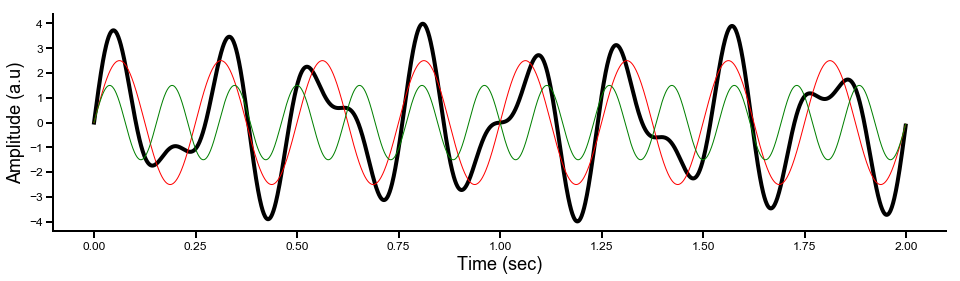

In [3]:
# plot signal and the sum of the waves
plt.figure(figsize=(16,4))
plt.plot(t,signal, lw = 4, color = 'black')
plt.plot(t, 2.5*wave(4), color='red', lw=1)
plt.plot(t, 1.5*wave(6.5), color = 'green', lw = 1)
#plt.plot(t, 0.5*wave(2.4), color= 'blue', lw = 1)
plt.xlabel("Time (sec)");plt.ylabel('Amplitude (a.u)');

<H2>Discrete Fourier transformation</H2>

In [4]:
# fourTime is the normalized time vector: we need a complex wave which is having the same
# number of points as the signal we want to analyze. It's important to keep the phase!

# you want the wave to start at zero.
fourTime = np.arange(len(t))/len(t)

In [5]:
# create a complex wave with the Eulers formula e^ik 
csw = lambda freq: np.exp( -1j*2*np.pi*freq*fourTime )

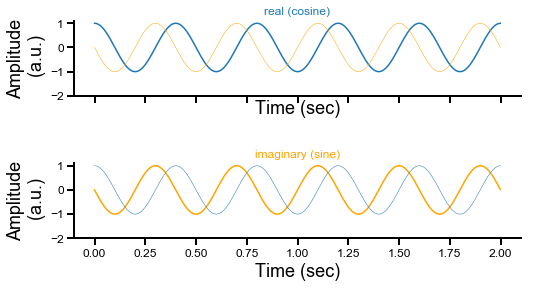

In [6]:
# plot complex wave between t=0 and t=1 in the real and imaginary axis

fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True)
ax[0].plot(t, csw(5).real, lw=1.5)
ax[0].plot(t, csw(5).imag, lw=0.5, color='orange')
ax[0].set_title('real (cosine)', color='C0')

ax[1].plot(t, csw(5).imag, color='orange', lw=1.5)
ax[1].plot(t, csw(5).real, lw=0.5, color='C0')
ax[1].set_title('imaginary (sine)', color='orange')

for myax in ax:
    myax.set_yticks(range(-2,2,1))
    myax.set_xlabel('Time (sec)')
    myax.set_ylabel('Amplitude\n (a.u.)')


In [7]:
# dot product of complex waves and signal for waves with frequencies betwen 0 and number of samples
# of the signal. It will return the Fourier coefficients (amplitude and phase) for every frequency.
FourierCoeff = list()
for f in range(len(t)):
    FourierCoeff.append( np.dot(signal, csw(f))/ len(t) )

In [8]:
# now compute amplitudes
amp = 2*np.abs(FourierCoeff)

In [9]:
# and compute phases
phi = np.angle(FourierCoeff)

In [10]:
# compute frequencies vector, it goes from zero (DC component) to half the sampling frequency (Nyquist)
# n/2 + 1 for the offset
Nyquist = sf/2
print('Nyquist frequency is {:2.2f} Hz'.format(Nyquist))

# To transform into Hz. If we have sf in samples/seconds, the units are Hz (e.g., sf = 30000 = 30 kHz)
# we need to know that we can only sample half of the sampling frequency (e.g., 15 kHz) but we need to express it
# in units of sampling points (e.g., 15000).


# n/2 + 1 is to take only the possitive frequencies (?)


hz = np.linspace(0, sf/2., num = int(np.floor(len(t)/2.))+1 )


Nyquist frequency is 500.00 Hz


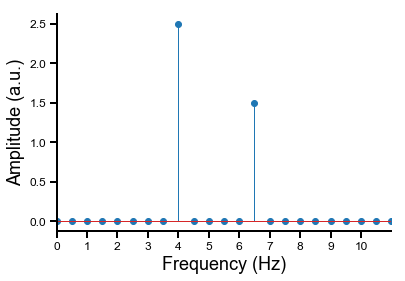

In [11]:
# plot frequencies vs amp
plt.stem(hz, amp[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xticks(range(11));
plt.xlim(0,11);

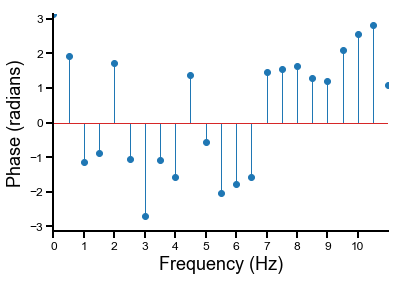

In [12]:
# plot phases vs freq
plt.stem(hz, phi[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)
plt.xticks(range(11));
plt.xlim(0,11);

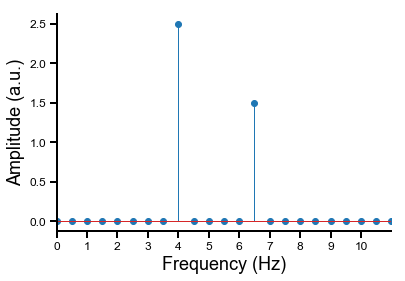

In [13]:
# with python fft
FourierCoeff = np.fft.fft(signal)/len(signal)
ampl = 2*np.abs(FourierCoeff)  
phi = np.angle(FourierCoeff)
# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(signal)/2.)+1 )

plt.stem(hz,ampl[range(0,len(hz))])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xticks(range(11));
plt.xlim(0,11);

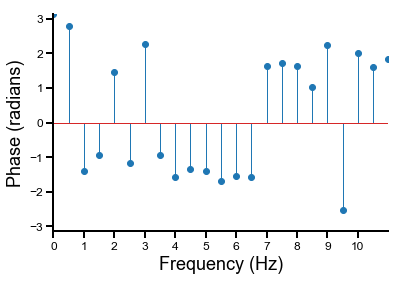

In [14]:
# plot phases vs freq
plt.stem(hz, phi[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)
plt.xticks(range(11));
plt.xlim(0,11);

<H2>A real example</H2>

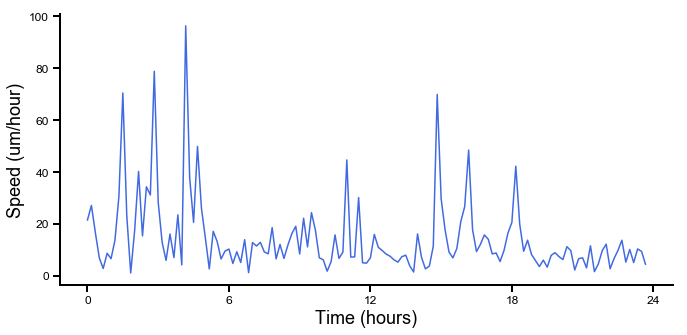

In [15]:
speed = np.loadtxt('speed.txt')
dt = 1/6. # write sampling points in hours -1 (i.e., 6 per hour )

time = np.arange(0, speed.size*dt, dt)

fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)
ax.plot(time, speed, color='royalblue', lw  = 1.5);
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/hour)');
ax.set_xticks(range(0, 25, 6));

In [16]:
# fourTime is the normalized time
fourTime = np.arange(len(time))/len(time)

# create a complex wave
csw = lambda freq: np.exp( -1j*2*np.pi*freq*fourTime )

In [17]:
# dot product of complex waves and signal for waves betwen 0 and half the time of the recording
FourierCoeff = list()
for f in range(len(time)):
    FourierCoeff.append( np.dot(speed, csw(f))/len(time) )

In [18]:
# now compute amplitudes
# extract amplitudes
ampl = 2*np.abs(FourierCoeff)

In [19]:
phi = np.angle(FourierCoeff)

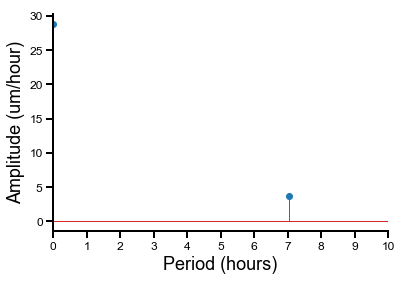

In [20]:
# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(speed)/2.)+1 )

plt.stem(hz,ampl[range(0,len(hz))])#, use_line_collection = True)
plt.xlabel('Period (hours)'), plt.ylabel('Amplitude (um/hour)')
plt.xticks(range(12))
plt.xlim(0,10)
plt.show()

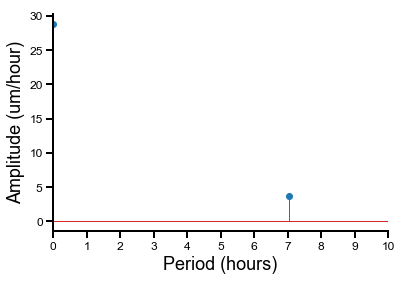

In [21]:
FourierCoeff = np.fft.fft(speed)/len(speed)
ampl = 2*np.abs(FourierCoeff)

# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(speed)/2.)+1 )

plt.stem(hz,ampl[range(0,len(hz))])#, use_line_collection = True)
plt.xlabel('Period (hours)'), plt.ylabel('Amplitude (um/hour)')
plt.xticks(range(12))
plt.xlim(0,10)
plt.show()

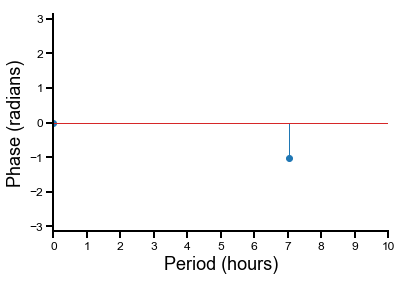

In [22]:
# compute phase vector
phi = np.angle(FourierCoeff)

plt.stem(hz,phi[:len(hz)])#, use_line_collection = True)
plt.xlabel('Period (hours)'), plt.ylabel('Phase (radians)')
plt.xticks(range(24))
plt.ylim(-np.pi, np.pi)
plt.xlim(0,10)
plt.show()

In [23]:
np.rad2deg(phi[:len(hz)][7])

-152.43843389998162

In [24]:
np.mean(speed)

14.436838153846155

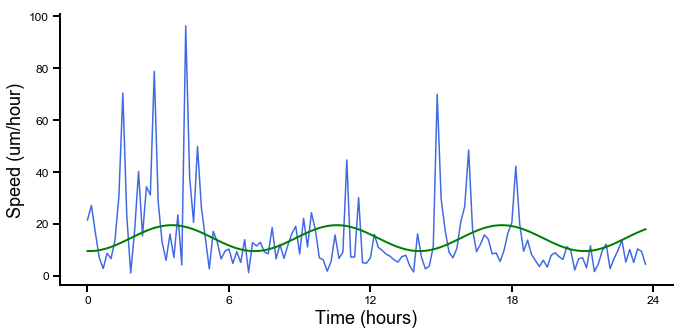

In [25]:
offset = np.mean(speed)
mywave2 = offset + 5*np.sin(2*np.pi*(1/7)*time + np.rad2deg(phi[:len(hz)][7])) # add 5 offset because speed is alwasy positive

fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)
ax.plot(time, speed, color='royalblue', lw  = 1.5);

ax.plot(time, mywave2, color='green', lw=2)

ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/hour)');
ax.set_xticks(range(0, 25, 6));

<H2>Compute with the DC component</H2>